# More illustrations of the vonMisesMixtures packages

During the basic presentation, we have ommitted a few possibly interested features of the packages. They are presented here.

In [1]:
import vonMisesMixtures as vonmises
print(vonmises.__version__)

import matplotlib.pyplot as plt
import numpy as np

1.0.0


First, we show that the method `density(x, mu, kappa)` accepts tables as parameters, in which case it returns an array with as mny columns as parameters have been given.

In [2]:
mus = [0,1,2,np.pi,-1,-2]
kappas = range(5,11)
x = np.linspace(-np.pi,np.pi,50)
vmfits = vonmises.density(x, mu=mus, kappa=kappas)
vmfits.shape

(50, 6)

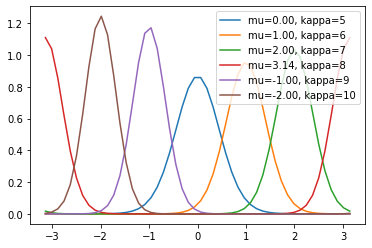

In [3]:
for i,mu,kappa in zip(range(vmfits.shape[1]),mus,kappas):
    plt.plot(x, vmfits[:,i], label="mu={:.2f}, kappa={}".format(mu, kappa))
plt.legend()
plt.show()

Due to the discrete parameterization of the probability densities, it is quite difficult to normalize them using the normalization factor calculated from the continuous probability distribution. Illustrate this by calculating the discrete sum of each of the above distributions.

In [4]:
np.sum(vmfits, axis=0)

array([7.79863158, 7.79868475, 7.81597383, 8.90821339, 7.79859334,
       7.8022191 ])

The best thing one can do is to normalize each time by the sum of the distribution

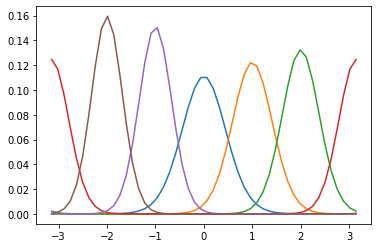

In [5]:
vmfits_norm = vmfits/np.sum(vmfits, axis=0)
for i in range(vmfits_norm.shape[1]):
    plt.plot(x, vmfits_norm[:,i])
plt.show()

## Precision of the `pdfit(series)` estimators

Let us illustrate the precision of the estimators obtained from the `vonmises_pdfit` method.

In [6]:
mu = 2
kappa = 7
for size in [200,2000,20000]:
    series = np.random.vonmises(mu, kappa, size)
    mu_fit, kappa_fit = vonmises.pdfit(series)
    print("mu = {:.5f}, kappa = {:.5f}".format(mu_fit, kappa_fit))

mu = 2.02383, kappa = 8.33304
mu = 2.00533, kappa = 7.23395
mu = 2.00168, kappa = 6.95796


One sees that, the largest the random sample is, the better the precision in the estimation of the parameters would be (statistically). One can get an idea of the precision of the estimators by making bootstrapping of the random sample.

## Alias for retro-compatibility

There are a number of alias that survived from version 0.1 available on [the officiel repository](https://framagit.org/fraschelle/mixture-of-von-mises-distributions/-/tree/0.1). They are 

 Method available in version 0.1 | Alias available in version 1.0 +
 -- | -- 
 `vonmises_pdfit` | `pdfit`
 `vonmises_density` | `density`
 `mixture_vonmises_pdfit` | `mixture_pdfit`

so from version 1.0.0, one can use either `vonmises_pdfit` or `pdfit` indifferently.

## Hellinger distance betwen two distributions

The [Hellinger distance](https://en.wikipedia.org/wiki/Hellinger_distance) is a measure of the distance between two random distribution using their densities. We here illustrate its usefullness in the case of the fit of a simple random von Mises sample.

Hellinger distance = 0.1632


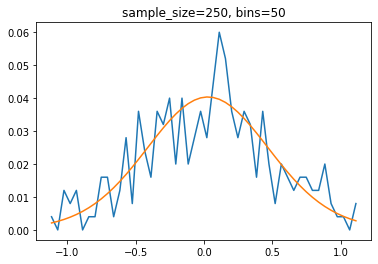

In [7]:
N,B = 250, 50
# generate artificial datas
x = np.random.vonmises(0,5,N)
x_histo = vonmises.tools.histogram(x,bins=B)

# fit the artificial datas
mu_fit, kappa_fit = vonmises.pdfit(x)
# generate a histogram on top of the fit
x_fit = vonmises.density(x_histo[0], mu_fit, kappa_fit)
x_fit = x_fit/np.sum(x_fit)

# calculate the Hellinger distance
hell_dist = vonmises.tools.hellinger_dist(x_histo[1],x_fit)
print("Hellinger distance = {:.4f}".format(hell_dist))

plt.plot(*x_histo)
plt.plot(x_histo[0], x_fit)
plt.title("sample_size={}, bins={}".format(N,B))
plt.show()

The smaller the Hellinger distance, the closer the distributions.

To get better fitting parameters and also smoother histogram, one can generate more random datas, as illustrated below. Then the Hellinger distance goes smaller.

Hellinger distance = 0.0604


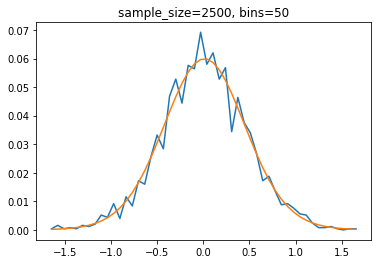

In [8]:
N,B = 2500, 50
# generate artificial datas
x = np.random.vonmises(0,5,N)
x_histo = vonmises.tools.histogram(x,bins=B)

# fit the artificial datas
mu_fit, kappa_fit = vonmises.pdfit(x)
# generate a histogram on top of the fit
x_fit = vonmises.density(x_histo[0], mu_fit, kappa_fit)
x_fit = x_fit/np.sum(x_fit)

# calculate the Hellinger distance
hell_dist = vonmises.tools.hellinger_dist(x_histo[1],x_fit)
print("Hellinger distance = {:.4f}".format(hell_dist))

plt.plot(*x_histo)
plt.plot(x_histo[0], x_fit)
plt.title("sample_size={}, bins={}".format(N,B))
plt.show()

But a too detailled histogram step (`bins` parameter in `tools.histogram`) might suggest that the distributions are not that close, at least regarding the Hellinger distance.

Hellinger distance = 0.1198


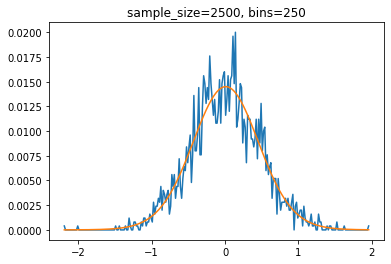

In [9]:
N,B = 2500, 250
# generate artificial datas
x = np.random.vonmises(0,5,N)
x_histo = vonmises.tools.histogram(x,bins=B)

# fit the artificial datas
mu_fit, kappa_fit = vonmises.pdfit(x)
# generate a histogram on top of the fit
x_fit = vonmises.density(x_histo[0], mu_fit, kappa_fit)
x_fit = x_fit/np.sum(x_fit)

# calculate the Hellinger distance
hell_dist = vonmises.tools.hellinger_dist(x_histo[1],x_fit)
print("Hellinger distance = {:.4f}".format(hell_dist))

plt.plot(*x_histo)
plt.plot(x_histo[0], x_fit)
plt.title("sample_size={}, bins={}".format(N,B))
plt.show()

In [10]:
from datetime import datetime
print("Last modification {}".format(datetime.now().strftime("%c")))

Last modification Tue Oct  5 20:32:52 2021
